In [2]:
 gdp_for_year ($) import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
data = pd.read_csv('master.csv')
data.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  
0                 796     Generation X  
1                 796           Silent  
2                 796     Generation X  
3                 796  G.I. Generation  
4                 796          Boomers

In [60]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [61]:
# count number of male and female
# 男女性数量
data['sex'].value_counts() 

female    13910
male      13910
Name: sex, dtype: int64

In [62]:
# country 
data['country'].value_counts(normalize=True)


Netherlands               0.013731
Austria                   0.013731
Mauritius                 0.013731
Iceland                   0.013731
Israel                    0.013372
                            ...   
Bosnia and Herzegovina    0.000863
Dominica                  0.000431
Macau                     0.000431
Cabo Verde                0.000431
Mongolia                  0.000359
Name: country, Length: 101, dtype: float64

In [63]:
# generation 
data['generation'].value_counts(normalize=True)

Generation X       0.230338
Silent             0.228756
Millenials         0.210065
Boomers            0.179367
G.I. Generation    0.098634
Generation Z       0.052840
Name: generation, dtype: float64

In [64]:
data['country'].value_counts()

Netherlands               382
Austria                   382
Mauritius                 382
Iceland                   382
Israel                    372
                         ... 
Bosnia and Herzegovina     24
Dominica                   12
Macau                      12
Cabo Verde                 12
Mongolia                   10
Name: country, Length: 101, dtype: int64

In [65]:
countryYear = data.groupby(['country-year'])
country_gb =  data.groupby(['country'])
# countryYear.mean()
# countryYear['suicides_no'].sum()
country_gb['suicides_no'].sum()




country
Albania                    1970
Antigua and Barbuda          11
Argentina                 82219
Armenia                    1905
Aruba                       101
                         ...   
United Arab Emirates        622
United Kingdom           136805
United States           1034013
Uruguay                   13138
Uzbekistan                34803
Name: suicides_no, Length: 101, dtype: int64

In [66]:

pd.crosstab(data['generation'], data['sex'], margins=True)

sex              female   male    All
generation                           
Boomers            2495   2495   4990
G.I. Generation    1372   1372   2744
Generation X       3204   3204   6408
Generation Z        735    735   1470
Millenials         2922   2922   5844
Silent             3182   3182   6364
All               13910  13910  27820

## 每一代的性别的比例

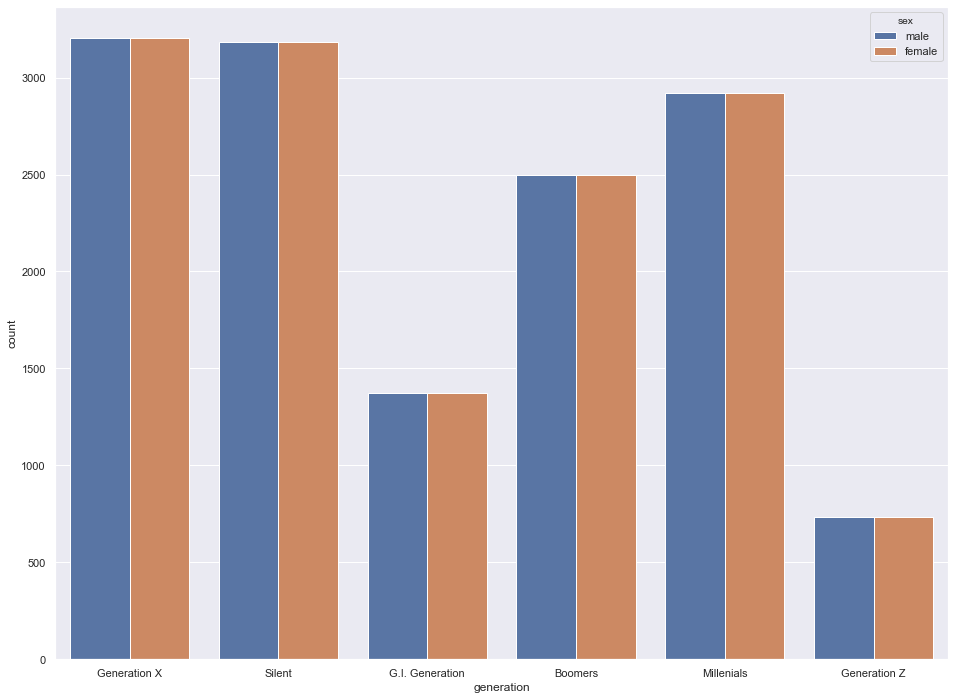

In [67]:
sns.countplot('generation', hue='sex', data=data)

## 不同性别的年龄段的统计

Text(0.5, 1.0, 'Difference gender suicid number, by Age ')

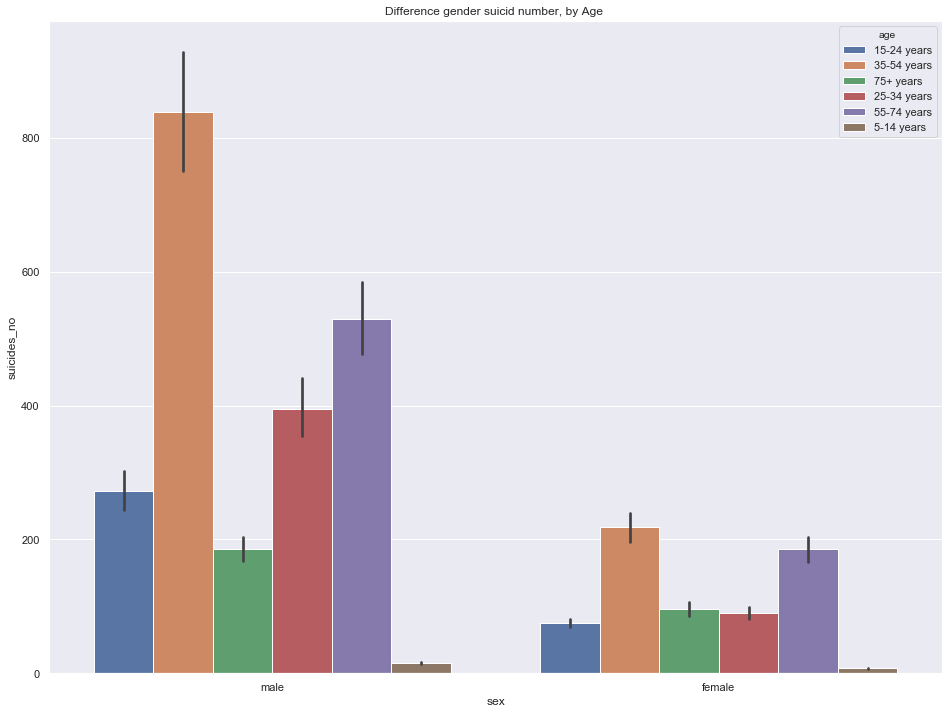

In [72]:
p = sns.barplot(x='sex', y='suicides_no', hue='age', data=data)
plt.title("Difference gender suicid number, by Age ")

In [13]:
count_year = data['year'].value_counts()
count_year

2009    1068
2001    1056
2010    1056
2007    1032
2011    1032
2002    1032
2003    1032
2000    1032
2006    1020
2008    1020
2005    1008
2004    1008
1999     996
2012     972
2013     960
1998     948
2014     936
1995     936
1996     924
1997     924
1994     816
1992     780
1993     780
1990     768
1991     768
2015     744
1987     648
1989     624
1988     588
1986     576
1985     576
2016     160
Name: year, dtype: int64

## 每年的总计数量变化

In [46]:
data = data.query('year != 2016')
data.rename(columns={'suicides_no':'total_suicides',
                        'suicides/100k pop':'suicides_per_100k',
                        ' gdp_for_year ($) ':'gdp_for_year',
                        'gdp_per_capita ($)':'gdp_per_capita',
                        'HDI for year': 'HDI_for_year'}, inplace=True)

agg_dict = {'country':'nunique', 'population':'sum', 'total_suicides':'sum'}
yearly_data = data[['year', 'country', 
                       'population',
                       'total_suicides']].groupby('year', as_index=False).agg(agg_dict)
yearly_data.rename(columns={'population':'Population',
                            'total_suicides':'Total Suicides'}, inplace=True)
yearly_data['Suicides by 100k people'] = 100000 * yearly_data['Total Suicides'] / ( yearly_data['Population'] )



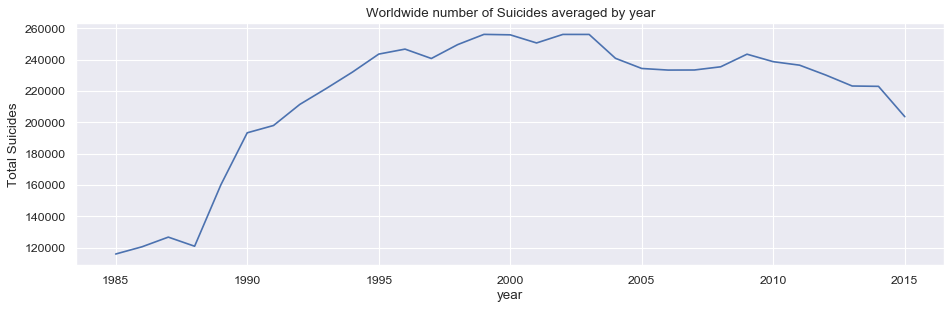

In [56]:
# 每年的数量变化，
# sorry， 我不是要画成这么多颜色 很喜庆的， love & peace
# sns.set(rc={'figure.figsize':(16,12)})
# sns.countplot(x='year', data=data)

fig, ax1 = plt.subplots(1,1,figsize=(14,4), dpi=80, sharey=False)

# sns.lineplot(data=yearly_data, y='Population', x='year', ax=ax1, label='Population')
# ax1.grid(False)
# ax1.legend(bbox_to_anchor=(1, 0.12))
# ax1.set_yticks([1e9, 1.4e9, 1.8e9, 2.2e9, 2.6e9]);
# ax1.set_ylim(1e9, 2.6e9)

# ax2 = plt.twinx()
# sns.lineplot(data=yearly_data, y='Total Suicides', x='year', ax=ax2, color='C3', label='Suicides')
# ax2.grid(False)
# ax2.set_ylim(1e5, 2.6e5)
# ax2.set_yticks([1e5, 1.4e5, 1.8e5, 2.2e5, 2.6e5]);
# ax2.legend(bbox_to_anchor=(1, 0.21))

sns.lineplot(data=yearly_data, y='Total Suicides', x='year')

plt.title('Worldwide number of Suicides averaged by year');

# 测试建立强相互关系图


In [73]:
import plotly.express as px

fig1 = px.line(data, x='age', y='suicides_no', color='sex')
fig1.show()

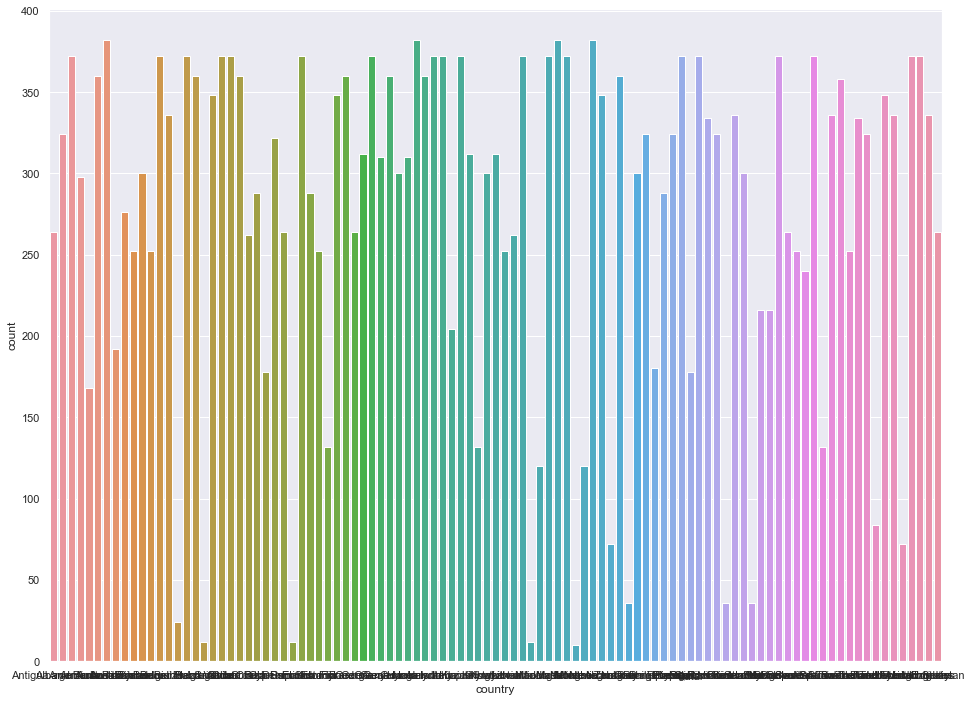

In [74]:
#每个国家的总计数目
sns.countplot(x='country', data=data)


### 数据转化和清理
1. 转化国家到每一个洲
2. 



In [75]:
import pycountry_convert as pc



countries = data['country']
continent = []

#转化国家到 每一个洲
country_code  = pc.country_name_to_country_alpha2(countries[0], cn_name_format="default")
continent_name = pc.country_alpha2_to_continent_code(country_code)
print("country_code: " + country_code + "\ncontinent_name: " + continent_name)

continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Oceania',
    'AF': 'Africa',
    'EU': "Europe"
}


for  country in countries:
    continent_name = ''
    if(country =='Republic of Korea'):
        continent_name = 'AS'
    elif(country =='Saint Vincent and Grenadines'):
        continent_name = 'NA'
    else:
        try:
            country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
            continent_name = pc.country_alpha2_to_continent_code(country_code)
        except KeyError:
            print(country)
    continent.append(continents[continent_name])
            
print(len(continent))
print(continent[0])

# 增加continent 列
data['continent'] = continent

# continents = {
#     'NA': 'North America',
#     'SA': 'South America', 
#     'AS': 'Asia',
#     'OC': 'Australia',
#     'AF': 'Africa',
#     'EU': "Euopean"
# }


# [continents[country_alpha2_to_continent_code(country_name_to_country_alpha2(country))] for country in countries]



country_code: AL
continent_name: EU
27820
Europe


In [76]:
data.head()

country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21      312900   
1  Albania  1987    male  35-54 years           16      308000   
2  Albania  1987  female  15-24 years           14      289700   
3  Albania  1987    male    75+ years            1       21800   
4  Albania  1987    male  25-34 years            9      274300   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation continent  
0                 796     Generation X    Europe  
1                 796           Silent    Europe  
2                 796     Generation X    Europe  
3                 796  G.I. Generation    Europe  
4                 796          Boomers    Europe

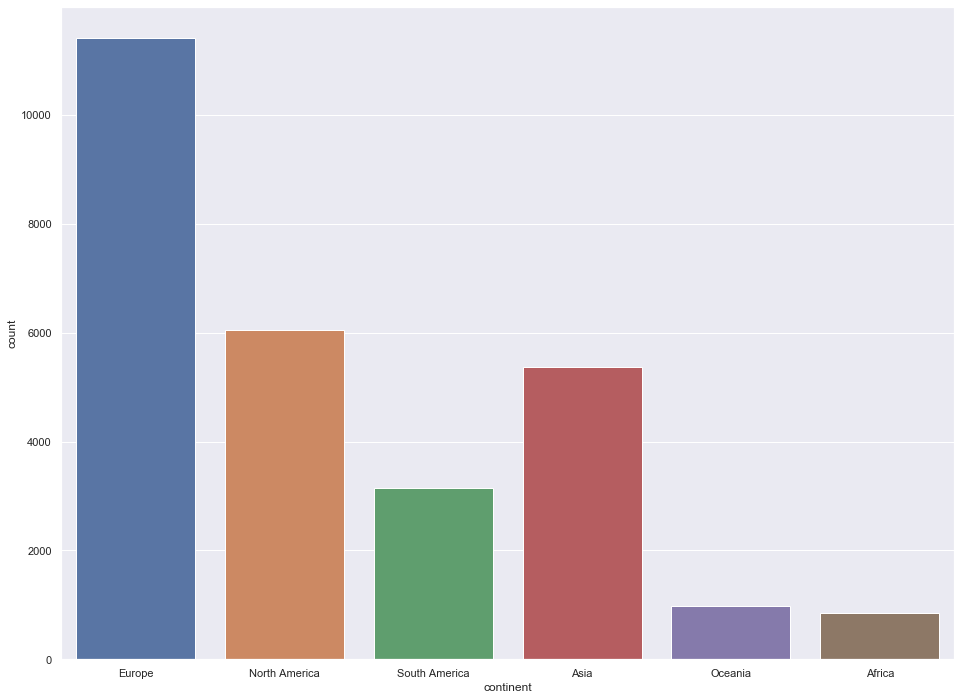

In [25]:
sns.countplot(x='continent', data=data)


In [90]:
continent_gb = data.groupby(['continent'])
country_gb =  data.groupby(['country'])
# countryYear.mean()
continent_gb['suicides_no'].sum()


# country_gb['suicides_no'].sum()

continent
Africa             11355
Asia             1456148
Europe           3408447
North America    1340639
Oceania            84851
South America     446980
Name: suicides_no, dtype: int64

In [95]:
import plotly.express as px
import numpy as np
gapminder = px.data.gapminder()
#gapminder.columns


fig = px.scatter_3d(data, x='year', y='continent', z='suicides_no', size='gdp_per_capita ($)', color='HDI for year',
                    hover_data=['continent'])
fig.update_layout(scene_zaxis_type="log")
fig.show()